In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import calendar as cd
sns.set(style="darkgrid", font="SimHei",font_scale=1.5, rc={"axes.unicode_minus": False})
warnings.filterwarnings("ignore")

In [13]:
data=pd.read_csv("data/Crime_Data_from_2010_to_2019.csv")
print(data.shape)
data.info()
#data.isnull().sum(axis=0)
data.columns

(2060948, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060948 entries, 0 to 2060947
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   TIME OCC        int64  
 1   Crm Cd          int64  
 2   Crm Cd Desc     object 
 3   Weapon Used Cd  float64
 4   Weapon Desc     object 
 5   DATE            object 
 6   WEEK            object 
 7   DAYTIME         object 
dtypes: float64(1), int64(2), object(5)
memory usage: 125.8+ MB


Index(['TIME OCC', 'Crm Cd', 'Crm Cd Desc', 'Weapon Used Cd', 'Weapon Desc',
       'DATE', 'WEEK', 'DAYTIME'],
      dtype='object')

<AxesSubplot:>

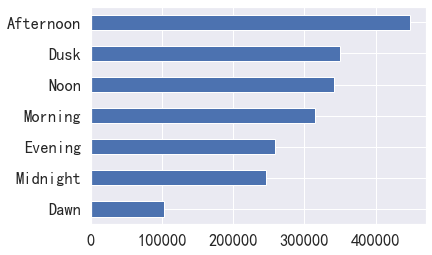

In [3]:
data["DAYTIME"].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

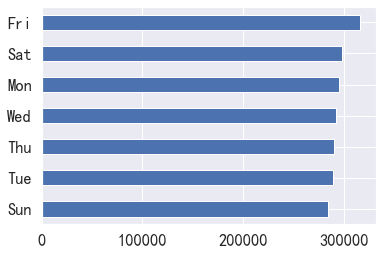

In [4]:
data["WEEK"].value_counts().sort_values().plot(kind='barh')

<AxesSubplot:>

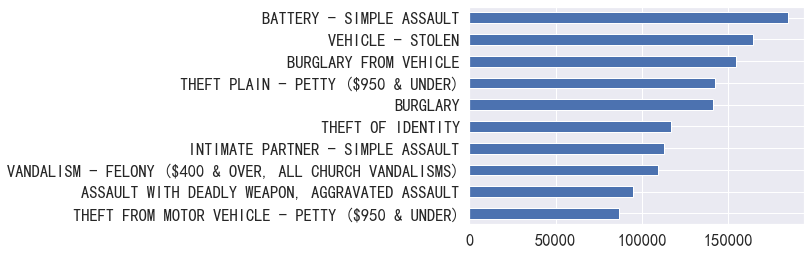

In [5]:
data["Crm Cd Desc"].value_counts().iloc[:10].sort_values().plot(kind='barh')

In [7]:
result=pd.DataFrame()

In [8]:
year=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021"]
result["Year"]=year

In [9]:
num_cases=[]
severe_rate=[]
severe_perday=[]
severe_perweekdays=[]
severe_perweekends=[]
gun_rate=[]
gun_perday=[]
gun_perweekdays=[]
gun_perweekends=[]
weekdays_perday=[]
weekends_perday=[]
dawn=[]
morning=[]
noon=[]
afternoon=[]
dusk=[]
evening=[]
midnight=[]

for i in year:
    year_cases=data[data['DATE'].str.contains(str(i))]
    year_severe=year_cases[(year_cases['Crm Cd']==110) | (year_cases['Crm Cd']==113) | (year_cases['Crm Cd']==121) | (year_cases['Crm Cd']==122) | (year_cases['Crm Cd']==815) | (year_cases['Crm Cd']==820) | (year_cases['Crm Cd']==821) | (year_cases['Crm Cd']==210) | (year_cases['Crm Cd']==220) | (year_cases['Crm Cd']==230) | (year_cases['Crm Cd']==231) | (year_cases['Crm Cd']==235) | (year_cases['Crm Cd']==236) | (year_cases['Crm Cd']==250) | (year_cases['Crm Cd']==251)]
    weekdays_severe=year_severe[year_severe["WEEK"].str.contains("Mon|Tue|Wed|Thu|Fri")]
    weekends_severe=year_severe[year_severe["WEEK"].str.contains("Sat|Sun")]
    year_gun=year_cases[year_cases['Weapon Desc'].str.contains("GUN|PISTOLFIREARM|REVOLVER|RIFLE|SHOTGUN|SEMIAUTOMATIC",na=False)]
    weekdays_gun=year_gun[year_gun["WEEK"].str.contains("Mon|Tue|Wed|Thu|Fri")]
    weekends_gun=year_gun[year_gun["WEEK"].str.contains("Sat|Sun")]
    year_weekdays_cases=year_cases[year_cases['WEEK'].str.contains("Mon|Tue|Wed|Thu|Fri")]
    year_weekends_cases=year_cases[year_cases['WEEK'].str.contains("Sat|Sun")]
    year_dawn=year_cases[year_cases['DAYTIME'].str.contains("Dawn")]
    year_morning=year_cases[year_cases['DAYTIME'].str.contains("Morning")]
    year_noon=year_cases[year_cases['DAYTIME'].str.contains("Noon")]
    year_afternoon=year_cases[year_cases['DAYTIME'].str.contains("Afternoon")]
    year_dusk=year_cases[year_cases['DAYTIME'].str.contains("Dusk")]
    year_evening=year_cases[year_cases['DAYTIME'].str.contains("Evening")]
    year_midnight=year_cases[year_cases['DAYTIME'].str.contains("Midnight")]
    
    num_cases.append(len(year_cases))
    severe_rate.append(len(year_severe)/len(year_cases))
    severe_perday.append(len(year_severe)/(365+1*cd.isleap(int(i))))
    severe_perweekdays.append(len(weekdays_severe)/(261+cd.isleap(int(i))))
    severe_perweekends.append(len(weekends_severe)/104)
    gun_rate.append(len(year_gun)/len(year_cases))
    gun_perday.append(len(year_gun)/(365+1*cd.isleap(int(i))))
    gun_perweekdays.append(len(weekdays_gun)/(261+cd.isleap(int(i))))
    gun_perweekends.append(len(weekends_gun)/104)
    weekdays_perday.append(len(year_weekdays_cases)/(261+cd.isleap(int(i))))
    weekends_perday.append(len(year_weekends_cases)/104)
    dawn.append(len(year_dawn)/len(year_cases))
    morning.append(len(year_morning)/len(year_cases))
    noon.append(len(year_noon)/len(year_cases))
    afternoon.append(len(year_afternoon)/len(year_cases))
    dusk.append(len(year_dusk)/len(year_cases))
    evening.append(len(year_evening)/len(year_cases))
    midnight.append(len(year_midnight)/len(year_cases))
    
result["Num_Cases"]=num_cases
result["Severe_Rate"]=severe_rate
result["Severe_Perday"]=severe_perday
result["Severe_PerWeekdays"]=severe_perweekdays
result["Severe_PerWeekends"]=severe_perweekends
result["Gun_Rate"]=gun_rate
result["Gun_Perday"]=gun_perday
result["Gun_PerWeekdays"]=gun_perweekdays
result["Gun_PerWeekends"]=gun_perweekends
result["Weekdays_Perday"]=weekdays_perday
result["Weekends_Perday"]=weekends_perday
result["Dawn_Rate"]=dawn
result["Morning_Rate"]=morning
result["Noon_Rate"]=noon
result["Afternoon_Rate"]=afternoon
result["Dusk_Rate"]=dusk
result["Evening_Rate"]=evening
result["Midnight_Rate"]=midnight

In [10]:
print(result)

    Year  Num_Cases  Severe_Rate  Severe_Perday  Severe_PerWeekdays  \
0   2010     209212     0.105525      60.484932           56.977011   
1   2011     200762     0.102514      56.386301           53.241379   
2   2012      65103     0.106539      18.950820           17.507634   
3   2013     192659     0.090730      47.890411           45.996169   
4   2014     195555     0.101843      54.564384           51.827586   
5   2015     215568     0.113157      66.830137           62.773946   
6   2016      76712     0.127138      26.647541           25.156489   
7   2017     231183     0.119896      75.939726           71.750958   
8   2018     229014     0.117294      73.594521           70.122605   
9   2019     217812     0.119511      71.317808           67.689655   
10  2020     116090     0.134318      42.603825           41.190840   
11  2021     111278     0.123115      37.534247           35.287356   

    Severe_PerWeekends  Gun_Rate  Gun_Perday  Gun_PerWeekdays  \
0          

In [11]:
result.to_csv("data/result.csv",index=0)

In [17]:
gun_crime=pd.DataFrame()
gun=data[data['Weapon Desc'].str.contains("GUN|PISTOLFIREARM|REVOLVER|RIFLE|SHOTGUN|SEMIAUTOMATIC",na=False)]
gun_crime=gun
gun_crime.to_csv("data/gun_crime.csv")